In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales-data/sales_data_sample.csv


In [2]:
# Load pandas, seaborn and matplotlib packages
import pandas as pd
import seaborn as sb 
import matplotlib.pyplot as mp
import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")

# Load the sales dataset into a Pandas DataFrame
data= pd.read_csv("/kaggle/input/sales-data/sales_data_sample.csv", encoding='latin1')

In [3]:
# viewing the whole dataframe
data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [4]:
#Viewing the first 5 rows of the dataframe
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [5]:
# viewing the last five rows of the dataframe
data.tail()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small
2822,10414,47,65.52,9,3079.44,5/6/2005 0:00,On Hold,2,5,2005,...,8616 Spinnaker Dr.,NaN,Boston,MA,51003,USA,NaN,Yoshido,Juri,Medium


In [6]:
#Checking whether the dataframe has any null values, if so how many of them
data.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [7]:
# Viewing the datatypes of each column in the dataframe and how many non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [8]:
# Viewing the aggregate functions of each column present in the dataframe
data.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [9]:
# Finding unique values in the dataframe & assigning to a new dataframe
newdf = pd.DataFrame(data.value_counts())
newdf

count
ORDERNUMBER QUANTITYORDERED PRICEEACH ORDERLINENUMBER SALES   ORDERDATE       STATUS     QTR_ID MONTH_ID YEAR_ID PRODUCTLINE      MSRP PRODUCTCODE CUSTOMERNAME               PHONE           ADDRESSLINE1                            ADDRESSLINE2 CITY         STATE    POSTALCODE COUNTRY   TERRITORY CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE       
10120       22              100.00    6               2461.36 4/29/2003 0:00  Shipped    2      4        2003    Motorcycles      99   S32_1374    Australian Collectors, Co. 03 9520 4555    636 St Kilda Road                       Level 3      Melbourne    Victoria 3004       Australia APAC      Ferguson        Peter            Small         1
10361       34              100.00    6               3871.92 12/17/2004 0:00 Shipped    4      12       2004    Vintage Cars     65   S24_3420    Souveniers And Things Co.  +61 2 9495 8555 Monitor Money Building, 815 Pacific Hwy Level 6      Chatswood    NSW      2067       Australia APAC      Huxley          Adrian           Medium        1
10347       30              100.00    1               3944.70 11/29/2004 0:00 Shipped    4      11       2004    Classic Cars     214  S10_1949    Australian Collectors, Co. 03 9520 4555    636 St Kilda Road                       Level 3      Melbourne    Victoria 3004       Australia APAC      Ferguson        Peter            Medium        1
            34              64.96     10              2208.64 11/29/2004 0:00 Shipped    4      11       2004    Vintage Cars     62   S18_2957    Australian Collectors, Co. 03 9520 4555    636 St Kilda Road                       Level 3      Melbourne    Victoria 3004       Australia APAC      Ferguson        Peter            Small         1
            42              49.60     5               2083.20 11/29/2004 0:00 Shipped    4      11       2004    Trucks and Buses 116  S18_1097    Australian Collectors, Co. 03 9520 4555    636 St Kilda Road                       Level 3      Melbourne    Victoria 3004       Australia APAC      Ferguson        Peter            Small         1
...                                                                                                                                                                                                                                                                                                                                                  ...
10169       38              68.39     8               2598.82 11/4/2003 0:00  Shipped    4      11       2003    Motorcycles      62   S18_3782    Anna's Decorations, Ltd    02 9936 8555    201 Miller Street                       Level 15     North Sydney NSW      2060       Australia APAC      O'Hara          Anna             Small         1
                            74.11     11              2816.18 11/4/2003 0:00  Shipped    4      11       2003    Motorcycles      69   S24_2360    Anna's Decorations, Ltd    02 9936 8555    201 Miller Street                       Level 15     North Sydney NSW      2060       Australia APAC      O'Hara          Anna             Small         1
            48              80.55     10              3866.40 11/4/2003 0:00  Shipped    4      11       2003    Motorcycles      81   S50_4713    Anna's Decorations, Ltd    02 9936 8555    201 Miller Street                       Level 15     North Sydney NSW      2060       Australia APAC      O'Hara          Anna             Medium        1
10223       20              66.04     12              1320.80 2/20/2004 0:00  Shipped    1      2        2004    Vintage Cars     68   S32_4289    Australian Collectors, Co. 03 9520 4555    636 St Kilda Road                       Level 3      Melbourne    Victoria 3004       Australia APAC      Ferguson        Peter            Small         1
10420       66              92.95     6               6134.70 5/29/2005 0:00  In Process 2      5        2005    Vintage Cars     92   S18_4409    Souveniers And Things Co.  +61 2 9495 8555 Monitor M

In [10]:
# filling null values in a specific column
data['TERRITORY']=data['TERRITORY'].fillna('North America')

In [11]:
# Replacing a new value with the old one in a specific column
data['TERRITORY'] = data['TERRITORY'].replace('Japan', 'APAC')

Total Sales :  10032628.85

Sales per Year:
              SALES
YEAR_ID            
2003     3516979.54
2004     4724162.60
2005     1791486.71


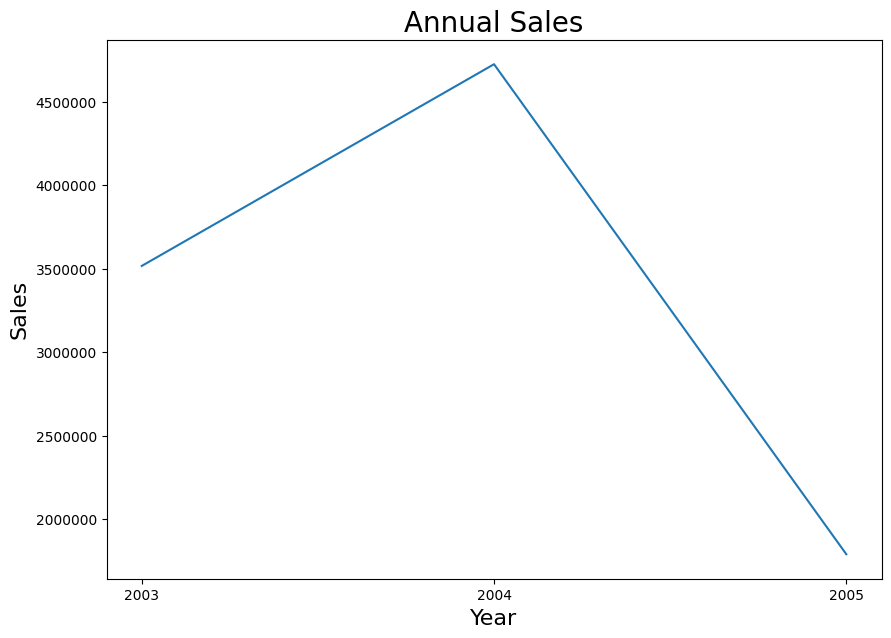

In [12]:
data['YEAR_ID']=data['YEAR_ID'].astype(str)

df_sales = pd.DataFrame(data)

# Total sales
total_sales = df_sales['SALES'].sum()
print("Total Sales : ", total_sales)
print("")

# Calculate sales per year
sales_per_year = df_sales.groupby('YEAR_ID')['SALES'].sum()

# Display results (you can choose to display as DataFrame or Series)
print("Sales per Year:")
pdy = pd.DataFrame(sales_per_year)
print(pdy)

# Lineplot of Sales over the years 
mp.figure(figsize=(10,7))
yearly_sales = data.groupby(['YEAR_ID'])['SALES'].sum().reset_index()
sb.lineplot(x='YEAR_ID',y='SALES', data=yearly_sales)
mp.xlabel("Year", fontsize = 16)
mp.ylabel("Sales", fontsize = 16)
mp.ticklabel_format(style='plain', axis='y')
mp.title("Annual Sales", fontsize = 20)
mp.show();

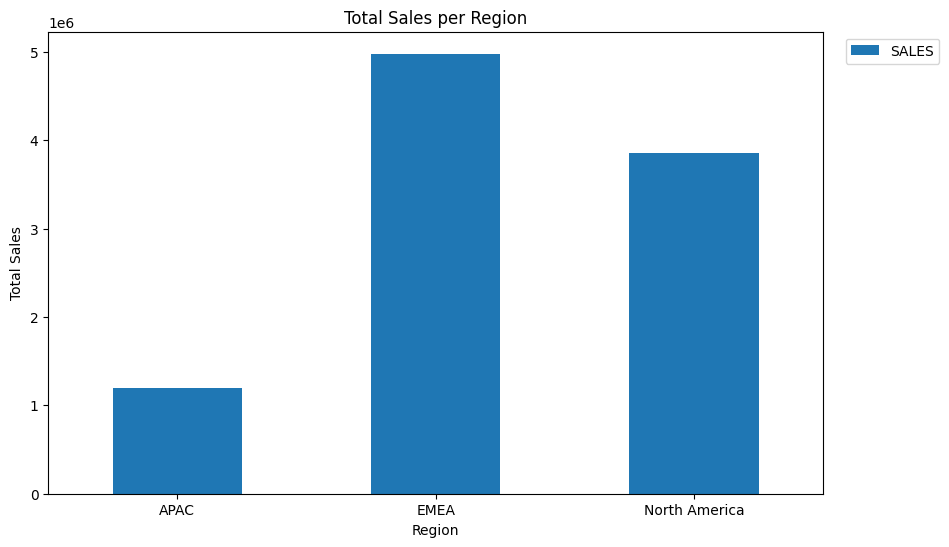

In [13]:
# Visualize the distribution of sales across different regions
pivot_table_sales=pd.pivot_table(
    data=data,
    values='SALES',
    index=['TERRITORY'],
    aggfunc='sum'
)
pivot_table_sales.plot(kind='bar', figsize=(10,6))
mp.xlabel('Region')
mp.ylabel('Total Sales')
mp.title("Total Sales per Region")
mp.xticks(rotation=0)
mp.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
mp.show()

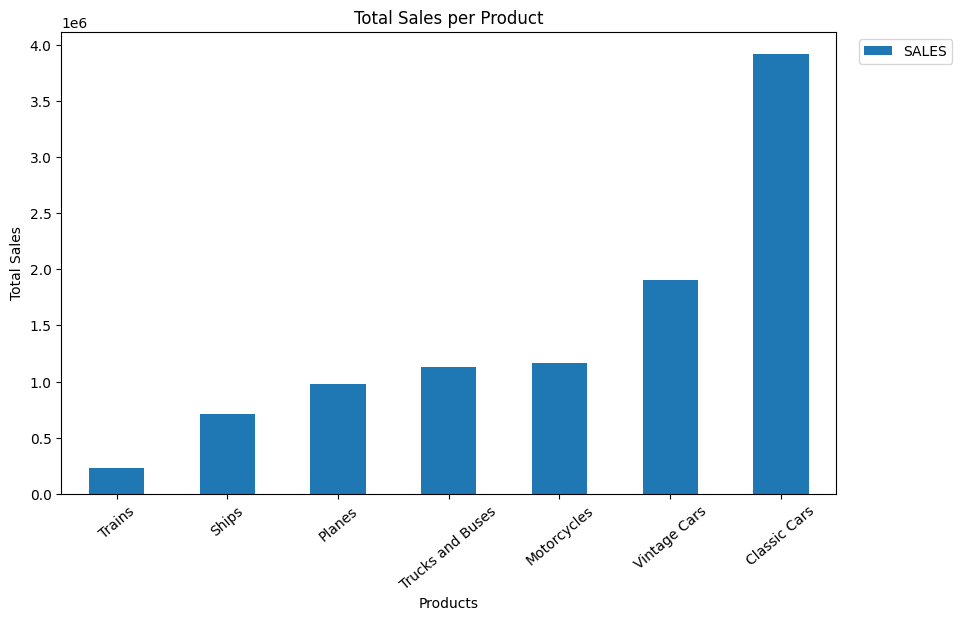

In [14]:
# Creating a bar plot to visualize the sales distribution across different products
pivot_table_products=pd.pivot_table(
    data=data,
    values='SALES',
    index='PRODUCTLINE',
    aggfunc='sum'
).sort_values(by='SALES', ascending=True)

pivot_table_products.plot(kind='bar', figsize=(10,6), )
mp.xlabel('Products')
mp.ylabel('Total Sales')
mp.title("Total Sales per Product")
mp.xticks(rotation=40)
mp.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
mp.show()

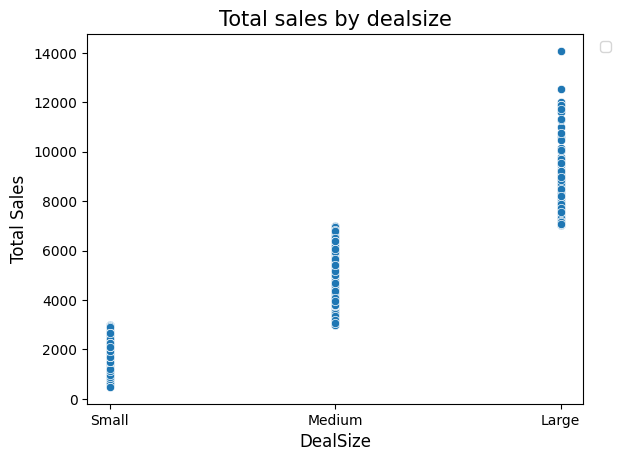

In [15]:
#scatter plot to visualize the relationship between sales and dealsize.
sb.scatterplot(x='DEALSIZE',y='SALES',data=data)

mp.xlabel('DealSize',fontsize=12)
mp.ylabel('Total Sales',fontsize=12)
mp.title("Total sales by dealsize", fontsize=15)
mp.xticks(rotation=0)
mp.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
mp.show()

In [16]:
# Pivot table for the year 2003
data_2003= data[data['YEAR_ID']=='2003']
pivot_2003 = pd.pivot_table(
    data=data_2003,
    values='SALES',
    index='MONTH_ID',
    columns='TERRITORY',
    aggfunc='sum'
)

# Pivot table for the year 2004
data_2004= data[data['YEAR_ID']=='2004']
pivot_2004 = pd.pivot_table(
    data=data_2004,
    values='SALES',
    index='MONTH_ID',
    columns='TERRITORY',
    aggfunc='sum'
)

# Pivot table for the year 2005
data_2005= data[data['YEAR_ID']=='2005']
pivot_2005 = pd.pivot_table(
    data=data_2005,
    values='SALES',
    index='MONTH_ID',
    columns='TERRITORY',
    aggfunc='sum'
)

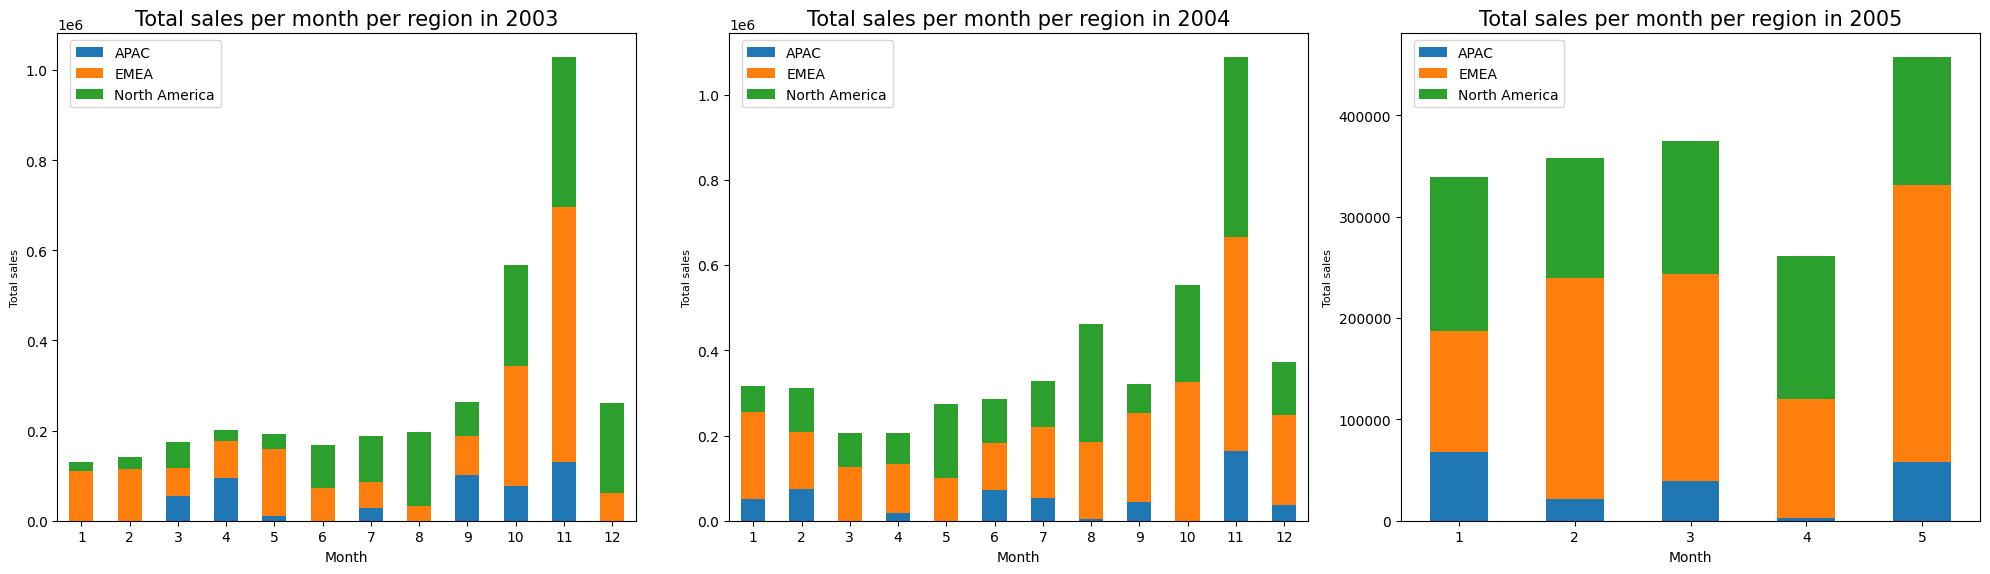

In [17]:
#Visualizing 3 charts together for the specific Years

fig, axes = mp.subplots(1, 3, figsize=(20,6))

pivot_2003.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_xlabel('Month', fontsize=10)
axes[0].set_ylabel('Total sales', fontsize=8)
axes[0].set_title("Total sales per month per region in 2003", fontsize=15)
axes[0].tick_params(axis='x', rotation=0)
axes[0].legend(bbox_to_anchor=(0.01, 1), loc='upper left')
 
pivot_2004.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_xlabel('Month', fontsize=10)
axes[1].set_ylabel('Total sales', fontsize=8)
axes[1].set_title("Total sales per month per region in 2004", fontsize=15)
axes[1].tick_params(axis='x', rotation=0)
axes[1].legend(bbox_to_anchor=(0.01, 1), loc='upper left')

pivot_2005.plot(kind='bar', stacked=True, ax=axes[2])
axes[2].set_xlabel('Month', fontsize=10)
axes[2].set_ylabel('Total sales', fontsize=8)
axes[2].set_title("Total sales per month per region in 2005", fontsize=15)
axes[2].tick_params(axis='x', rotation=0)
axes[2].legend(bbox_to_anchor=(0.01, 1), loc='upper left')

# Adjust subplot spacing
mp.subplots_adjust(
    hspace=0.5,  # Increase vertical spacing
    wspace=0.5,  # Increase horizontal spacing
    left=0.1,    # Increase left margin
    right=0.9,   # Increase right margin
    top=0.9,     # Increase top margin
    bottom=0.1   # Increase bottom margin
)

mp.tight_layout()
mp.savefig("2003, 2004, 2005")
mp.show()

In [18]:
# Calculating the percentage of sales for each Territory

df_salespercentage = pd.DataFrame(data)

# Total sales
total_sales = df_salespercentage['SALES'].sum()

print("Total Sales : ", total_sales)

print("")

# Calculate sales per region
sales_per_region = df_salespercentage.groupby('TERRITORY')['SALES'].sum()

# Display results (you can choose to display as DataFrame or Series)
print("Sales per Territory:")
print(sales_per_region)

print("")

# Calculate percentage contribution
percentage_contribution = ((sales_per_region / total_sales) * 100).round(2)
pdf = pd.DataFrame(percentage_contribution);
pdf

Total Sales :  10032628.85

Sales per Territory:
TERRITORY
APAC             1201295.05
EMEA             4979272.41
North America    3852061.39
Name: SALES, dtype: float64



,SALES
TERRITORY,
APAC,11.97
EMEA,49.63
North America,38.40


In [19]:
if 'DEALSIZE' in data.columns:
    # Convert 'DEALSIZE' to numeric using ordinal encoding
    deal_size_mapping = {'Small': 1, 'Medium': 2, 'Large': 3}
    data['DEALSIZE_NUMERIC'] = data['DEALSIZE'].map(deal_size_mapping)
    
    # Check if 'SALES' column exists
    if 'SALES' in data.columns:
        correlation = data[['SALES', 'DEALSIZE_NUMERIC']].corr()
        print('Correlation between Sales and Deal Size:')
        print(correlation)
    else:
        print("The DataFrame does not contain a column named 'SALES'. Please check the DataFrame.")
        print("Available columns:", data.columns)
else:
    print("The DataFrame does not contain a column named 'DEALSIZE'. Please check the DataFrame.")
    print("Available columns:", data.columns)

Correlation between Sales and Deal Size:
                     SALES  DEALSIZE_NUMERIC
SALES             1.000000          0.862814
DEALSIZE_NUMERIC  0.862814          1.000000


In [20]:
# Identify the top-performing (top 3) products in terms of sales year on year.

# grouping each product by their sales
d = data.groupby('PRODUCTLINE')['SALES'].sum()

# finding the top 3 products for the above
top3 = d.nlargest(3)

dftop3 = pd.DataFrame(top3)

dftop3

,SALES
PRODUCTLINE,
Classic Cars,3919615.66
Vintage Cars,1903150.84
Motorcycles,1166388.34


In [21]:
df_salespercentage = pd.DataFrame(data)


total_sales = df_salespercentage['SALES'].sum()

print("Total Sales : ", total_sales)
print("")

sales_per_product = df_salespercentage.groupby('PRODUCTLINE')['SALES'].sum()

percentage_contribution = ((sales_per_product / total_sales) * 100).round(2)
print("\nPercentage Contribution by Products:")
prdf = pd.DataFrame(percentage_contribution);
prdf

Total Sales :  10032628.85


Percentage Contribution by Products:


,SALES
PRODUCTLINE,
Classic Cars,39.07
Motorcycles,11.63
Planes,9.72
Ships,7.12
Trains,2.26
Trucks and Buses,11.24
Vintage Cars,18.97


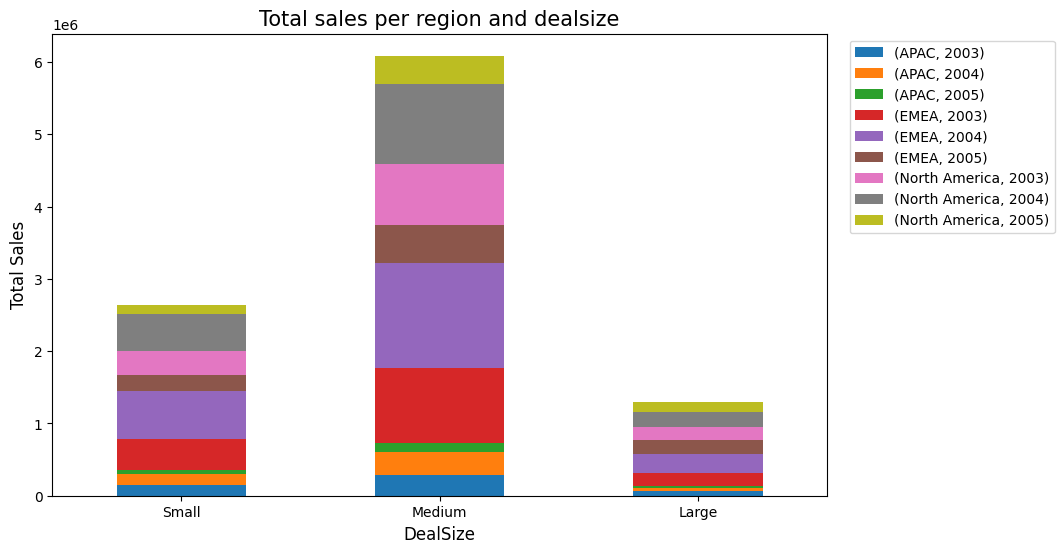

In [22]:
# Creating a pivot table for two columns using aggregate function
pivot_table_status = data.pivot_table(
    index='DEALSIZE',
    columns= ['TERRITORY','YEAR_ID'],
    values='SALES',
    aggfunc='sum'
).sort_values(by='DEALSIZE', ascending=False)

# Visualize the above table using stacked bar chart
pivot_table_status.plot(kind='bar', figsize=(10,6), stacked=True)
mp.xlabel('DealSize',fontsize=12)
mp.ylabel('Total Sales',fontsize=12)
mp.title("Total sales per region and dealsize", fontsize=15)
mp.xticks(rotation=0)
mp.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
mp.show()

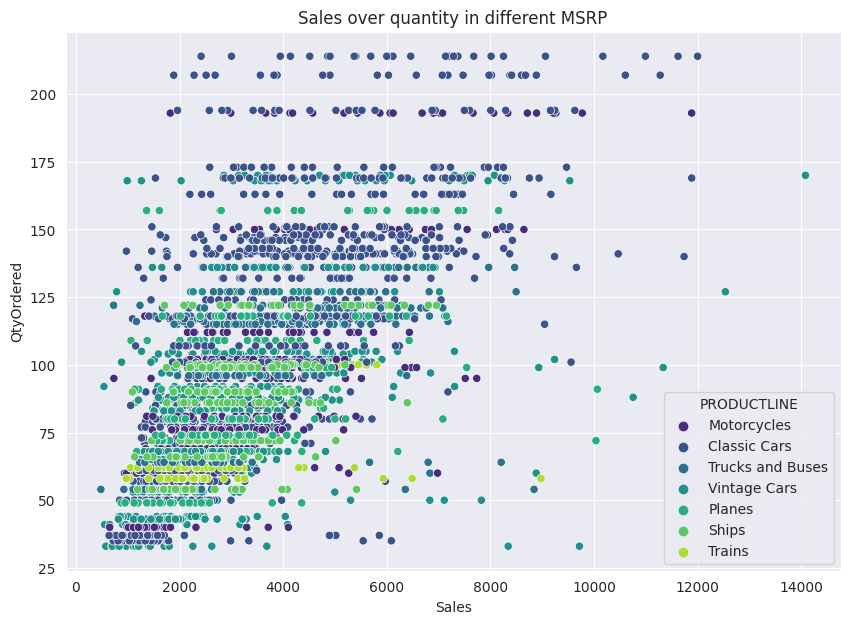

In [23]:
# Visualize using the scatter plot and set the background colour of the chart
sb.set_style('darkgrid')
mp.figure(figsize=(10,7))
sb.scatterplot(x='SALES',y='MSRP',hue='PRODUCTLINE',data=data, palette='viridis')
mp.xlabel("Sales")
mp.ylabel("QtyOrdered")
mp.title("Sales over quantity in different MSRP")
mp.show();

In [24]:
# To calculate the outliers, first we need to find the quantile values
# first is 25%, Second is 50%, third ids 75% and the last quantile is 100%
q1 = data['QUANTITYORDERED'].quantile(0.25)
q2 = data['QUANTITYORDERED'].quantile(0.50)
q3 = data['QUANTITYORDERED'].quantile(0.75)
print("The first quantile is: ", q1)
print("The second quantile is: ", q2)
print("The third quantile is: ", q3)

The first quantile is:  27.0
The second quantile is:  35.0
The third quantile is:  43.0


In [25]:
# Finding the Quartile range
IQR=q3-q1
IQR

16.0

In [26]:
#Lower threshold
lower_bound = q1-1.5*IQR
lower_bound

3.0

In [27]:
#Upper threshold
upper_bound =q3+1.5*IQR
upper_bound

67.0

In [28]:
#To calculate the outlier
outlier = data[(data['QUANTITYORDERED']<lower_bound)|(data['QUANTITYORDERED']>upper_bound)]
outlier

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,DEALSIZE_NUMERIC
418,10405,97,93.28,5,9048.16,4/14/2005 0:00,Shipped,2,4,2005,...,NaN,Strasbourg,NaN,67000,France,EMEA,Citeaux,Frederique,Large,3
598,10407,76,100.00,2,14082.80,4/22/2005 0:00,On Hold,2,4,2005,...,NaN,San Jose,CA,94217,USA,North America,Frick,Sue,Large,3
1666,10412,70,100.00,10,8498.00,5/3/2005 0:00,Shipped,2,5,2005,...,NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Large,3
1714,10407,76,94.50,6,7182.00,4/22/2005 0:00,On Hold,2,4,2005,...,NaN,San Jose,CA,94217,USA,North America,Frick,Sue,Large,3
1995,10405,76,100.00,3,11739.70,4/14/2005 0:00,Shipped,2,4,2005,...,NaN,Strasbourg,NaN,67000,France,EMEA,Citeaux,Frederique,Large,3
1996,10419,70,100.00,8,9240.00,5/17/2005 0:00,Shipped,2,5,2005,...,NaN,Salzburg,NaN,5020,Austria,EMEA,Pipps,Georg,Large,3
2586,10401,85,88.75,10,7543.75,4/3/2005 0:00,On Hold,2,4,2005,...,NaN,Newark,NJ,94019,USA,North America,Brown,William,Large,3
2689,10401,77,92.00,9,7084.00,4/3/2005 0:00,On Hold,2,4,2005,...,NaN,Newark,NJ,94019,USA,North America,Brown,William,Large,3


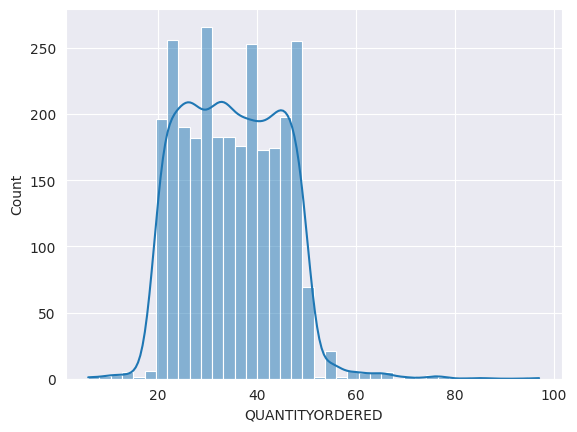

In [29]:
#Visualising the outlier using histogram
sb.histplot(data['QUANTITYORDERED'], kde=True, bins=40)
mp.show()